# Lego Sets Data From 1949 - 2020

By Dominic Graziano

Explanation of data - 

Name = original set name \
Theme = designated theme of the set \
Minifigs = number of minifigures contained in the set \
Subtheme = subtheme within the theme \
Desc = written description of the set \
Prices = MSRP price of the set, contains dollars, pounds or euros \
Pieces = number of pieces contained in the set \
Year = year the set was listed as being introduced

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb

Some of the things I wanted to showcase with this data are:
* the price discrepancies between the themes (licensed themes such as Star Wars, Marvel, DC, compared to lego original themes)
* see the price per piece breakdown throughout the history of lego
* breakdown the number of sets and themes produced per year


In [99]:
df = pd.read_csv('lego.csv')
df.head()

,Unnamed: 0,Name,Theme,Minifigs,Subtheme,Desc,Prices,Pieces,Year
0,0,700-12,System,NaN,Basic Set,700-12: Automatic Binding Bricks,NaN,NaN,1949
1,1,700_1_1-1,System,NaN,Supplemental,700_1_1-1: Individual 2 x 4 Bricks,NaN,NaN,1950
2,2,700_1_2-1,System,NaN,Supplemental,700_1_2-1: Individual 2 x 2 Bricks,NaN,NaN,1950
3,3,700_A-1,System,NaN,Basic Set,700_A-1: Automatic Binding Bricks Small Brick ...,NaN,NaN,1950
4,4,700_B_1-1,System,NaN,Supplemental,700_B_1-1: Individual 1 x 4 x 2 Window (withou...,NaN,NaN,1950


In [100]:
df = df.drop(columns = ["Unnamed: 0"])


In [101]:
df['Theme'].unique()

array(['System', 'Promotional', 'Dacta', 'Samsonite', 'Trains', 'Books',
       'Universal Building Set', 'Legoland', 'Duplo', 'Minitalia',
       'LEGOLAND', 'Homemaker', 'Gear', 'Basic',
       'Building Set with People', 'PreSchool', 'Hobby Set', 'Technic',
       'Service Packs', 'Town', 'Castle', 'Space', 'Fabuland', 'Scala',
       'Boats', 'Model Team', 'Assorted', 'Pirates', 'Belville',
       'Creator', 'Freestyle', 'Primo', 'Aquazone', 'Time Cruisers',
       'Western', 'Classic', 'Adventurers', 'Znap', 'Racers',
       'Mindstorms', 'Education', 'Seasonal', 'Rock Raiders', 'Star Wars',
       'Studios', 'Baby', 'Action Wheelers', 'Sports', 'Bulk Bricks',
       'Creator Expert', 'Mickey Mouse', 'Bionicle', 'Jack Stone',
       'Harry Potter', 'Dinosaurs', 'Alpha Team', 'Explore', 'Spybotics',
       'Galidor', 'Miscellaneous', 'Island Xtreme Stunts', 'Clikits',
       'World City', '4 Juniors', 'Spider-Man', 'Discovery', 'Quatro',
       'Make and Create', 'City', 'Factory',

In [102]:
df[df['Theme'] == 'Star Wars']

,Name,Theme,Minifigs,Subtheme,Desc,Prices,Pieces,Year
4438,7101-1,Star Wars,2.0,Episode I,7101-1: Lightsaber Duel,$6.00,52.0,1999
4439,7110-1,Star Wars,2.0,Episode IV,7110-1: Landspeeder,$6.00,49.0,1999
4440,7111-1,Star Wars,NaN,Episode I,7111-1: Droid Fighter,$6.00,62.0,1999
4441,7121-1,Star Wars,4.0,Episode I,7121-1: Naboo Swamp,$10.00,82.0,1999
4442,7128-1,Star Wars,3.0,Episode VI,7128-1: Speeder Bikes,$10.00,93.0,1999
...,...,...,...,...,...,...,...,...
16634,912056-1,Star Wars,NaN,Magazine Gift,912056-1: TIE Striker,NaN,28.0,2020
16635,912057-1,Star Wars,2.0,Magazine Gift,912057-1: R2-D2 and MSE-6,NaN,13.0,2020
16636,912058-1,Star Wars,NaN,Magazine Gift,912058-1: Sith Infiltrator,NaN,34.0,2020
16637,912059-1,Star Wars,1.0,Magazine Gift,912059-1: Elite Praetorian Guard,NaN,7.0,2020


I wanted to filter out and only get the sets that are based on the dollar

In [103]:
df = df[df['Prices'].str.contains('€') == False]

Get rid of the  $ and | which won't allow us to convert the string to a float 

In [104]:
df['Prices'] = df['Prices'].str.replace('\$','')
df['Prices'] = df['Prices'].str.replace('\|','')
 
df['Prices'] = df['Prices'].astype(float)


/var/folders/kf/8556syz14vn70lw4383jfz_c0000gn/T/ipykernel_51020/1905844088.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Prices'] = df['Prices'].str.replace('\$','')
/var/folders/kf/8556syz14vn70lw4383jfz_c0000gn/T/ipykernel_51020/1905844088.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Prices'] = df['Prices'].str.replace('\|','')


In [105]:
df['Price_Per_Piece'] = df['Prices'] / df['Pieces']
df.head()

,Name,Theme,Minifigs,Subtheme,Desc,Prices,Pieces,Year,Price_Per_Piece
179,215-3,Samsonite,NaN,Supplemental,215-3: 2 X 8 Bricks,0.5,9.0,1961,0.055556
181,217-3,Samsonite,NaN,Supplemental,217-3: 4 x 4 Corner Bricks,0.5,10.0,1961,0.050000
182,218-3,Samsonite,NaN,Supplemental,218-3: 2 x 4 Bricks,0.5,20.0,1961,0.025000
183,219-2,Samsonite,NaN,Supplemental,219-2: 2 X 3 Bricks,0.5,24.0,1961,0.020833
184,220-2,Samsonite,NaN,Supplemental,220-2: 2 X 2 Bricks,0.5,33.0,1961,0.015152


in future use this code to write a loop through all years and plot

In [106]:
df[df['Year']== 2008]['Theme'].nunique()

23

In [107]:
sort_p = df.sort_values(by = 'Prices' ,ascending= False)
sort_p = sort_p[:50]
sort_p['Theme'].value_counts()

Star Wars           9
Education           8
Technic             7
Creator Expert      6
Mindstorms          6
Gear                5
Dacta               2
Trains              2
Architecture        1
Studios             1
Monster Fighters    1
City                1
Space               1
Name: Theme, dtype: int64

In [108]:
df.sort_values(by = 'Price_Per_Piece', ascending= False)

,Name,Theme,Minifigs,Subtheme,Desc,Prices,Pieces,Year,Price_Per_Piece
3754,8299-1,Technic,1.0,NaN,8299-1: Search Sub,50.00,0.0,1997,inf
8552,10287-1,Mindstorms,NaN,NXT,10287-1: Intelligent NXT Brick (Black),169.99,1.0,2009,169.99
4480,9709-1,Mindstorms,NaN,1.0,9709-1: RCX Programmable LEGO Brick,110.00,1.0,1999,110.00
4869,9917-1,Education,NaN,Mindstorms,9917-1: DCP Sensor Connector Cable,59.00,1.0,2000,59.00
9601,10286-1,Mindstorms,NaN,NXT,10286-1: Colour Sensor,54.99,1.0,2011,54.99
...,...,...,...,...,...,...,...,...,...
16683,5005893-1,Gear,NaN,Housewares,5005893-1: White Black and Gray Wall Hanger Set,9.99,NaN,2020,NaN
16684,5005894-1,Gear,NaN,Housewares,5005894-1: Pink Light Blue and White Wall Hang...,9.99,NaN,2020,NaN
16685,5005963-1,Gear,NaN,Stationery,5005963-1: 12 Pack Marker Set,19.99,NaN,2020,NaN
16690,5006035-1,Gear,NaN,Miscellaneous,5006035-1: Holiday Bag Tag Stormtrooper,5.99,NaN,2020,NaN


In [109]:
year_df = df.groupby('Year')


In [111]:
year_theme_df = df.groupby('Year')['Theme'].nunique()

<AxesSubplot:xlabel='Year'>

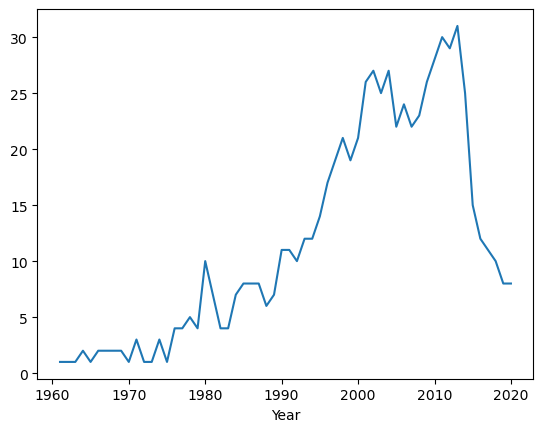

In [112]:
year_theme_df.plot()